In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def mock_observation_variance(sigma_out, sigma_in, L_inmin, L_inmax, Ltotmin=1250, Ltotmax=20000, dL=5):
    """
    """
    assert sigma_out > sigma_in, ("Variance value 'outside the survey' (sigma_out) " +
                                  "should be higher than 'inside the survey' (sigma_in)")

    assert sigma_out/sigma_in < 1e16, ("Ratio of sigma_out/sigma_in must be smaller " +
                                       "than 1e16. Otherwise, risk of numerical errors.")

    assert L_inmin < L_inmax, ("Lower transition wavelength (L_inmin) from 'outside' " +
                               "to 'inside' the survey should be smaller than transition" +
                               "back to 'outside' (L_inmax)")

    assert (L_inmin > Ltotmin) and (L_inmax < Ltotmax), ("L_inmin and L_inmax must be " +
                                                         "within the spectra wavelength " +
                                                         "limits.")    

    assert (L_inmax - L_inmin) >= 50, ("L_inmax - L_inmin must be larger than 50. " +
                                      "If not, the double hyperbolic tangent parameterisation " +
                                      "risks not reaching the lower limit. This is " +
                                      "a hard-coded but reasonable value.")
    
    wavelength = np.arange(Ltotmin, Ltotmax, dL)
    pivot = (L_inmin + L_inmax)/2.
    
    B = 0.1 # Reduce this value if you want the transition to be smoother
    A = (sigma_out - sigma_in)/2.
    D = (sigma_out + sigma_in)/2.
    
    # Lower hyperbolic tangent
    C = L_inmin
    wave_low = wavelength[wavelength < pivot]
    sigma_low = D - A*np.tanh(B*(wave_low - C)) 
    
    # Upper hyperbolic tangent
    C = L_inmax
    wave_high = wavelength[wavelength >= pivot]
    sigma_high = D + A*np.tanh(B*(wave_high - C))
    
    variance = np.hstack([sigma_low, sigma_high])
    
    return wavelength, variance

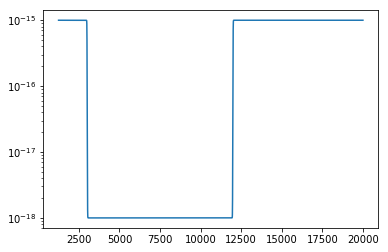

In [18]:
wave, flux = mock_observation_variance(1e-15, 1e-18, 3000, 12000, Ltotmin=1250, Ltotmax=20000, dL=5)
plt.plot(wave, flux)
plt.yscale("log")

# 1) Dark Energy Spectroscopic Instrument (DESI) configurations

Rationale for sigma choices: from DESI instrument specifications (https://arxiv.org/pdf/1611.00037.pdf), I read from Fig. 7.4 an approximate noise value of sigma_in = 1e-17. For sigma_out, I picked one of the typical OII doublet values quoted (i.e. 1e-16) and fixed a very low SNR (1/50):

In [19]:
1e-16/0.02

5e-15

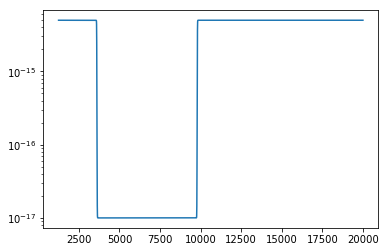

In [28]:
wave, flux = mock_observation_variance(5e-15, 1e-17, 3600, 9800, Ltotmin=1250, Ltotmax=20000, dL=5)
plt.plot(wave, flux)
plt.yscale("log")

# 2) Euclid NISP configurations

If we want to test only the impact of the redshift range being observed, I am going to use DESI sigmas above, but only select the near infrared range that Euclid's spectrograph is expected to observe.

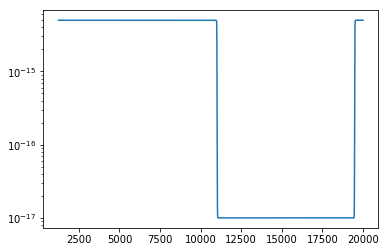

In [30]:
wave, flux = mock_observation_variance(5e-15, 1e-17, 11000, 19500, Ltotmin=1250, Ltotmax=20000, dL=5)
plt.plot(wave, flux)
plt.yscale("log")